# An Analysis of

### Authored by: Gavin Crisologo, Josue Melendez, Caleb Solomon, & Matthew Yu



## Table of Contents
### Introduction
### [Part 1: Data Collection](#Part-1--Data-Collection)
### [Part 2: Data Cleaning](#Part-2--Data-Cleaning)
### [Part 3: Exploratory Data Analysis](#Part-3--Exploratory-Data-Analysis)
### [Part 4: Model Implementation](#Part-4--Model-Implementation)
### [Part 5: Visualizations](#Part-5--Visualizations)
### [Part 6: Conclusions](#Part-6--Conclusions)

## Introduction

Welcome! When discussing data science in the field of finance and economics, things can be confusing. Not only are there plenty of ways to use data science in economics but there are dozens of topics that can be covered, such as economic forecasting or financial consulting. To make this learning process easier for any prospective data scientist, this tutorial has been made to guide you through the process of obtaining data, cleaning it, and modeling it for any future projects. For the purposes of this tutorial, we will be looking at using data science principles in the context of modeling economic health using GDP and GDP per capita..

But what are Gross Domestic Product and Gross Domestic Product per capita?

Gross Domestic Product, otherwise known as GDP, is the measure of the total monetary value of all goods and services produced in a country throughout a period of time and is typically measured anually. It is an enormous measurement, accounting for everything from gum at a gas station to professional medical services. It represents the production power of an economy and is used in a variety of applications from economic forecasting to policy making to business and investment strategies. 

Gross Domestic Product per capita refers to an individuals average economic output. It is measured by dividing Gross Domestic Product by the population size. GDP per capita provides an indicaor for the economic prosperity and standard of living within a country. 

Throughout this tutorial we will be referring to any instance of Gross Domestic Product as GDP, and will be using a GDP per capita dataset alongside a C02 per capita and daily income datasets to create future GDP per capita predictions. To learn more about GDP per capita, its definition and its uses please visit [here](https://www.investopedia.com/terms/p/per-capita-gdp.asp).

But how can we use it?

Often, when discussing how to use various metrics such as GDP, the "how" of the process is often overlooked or neglected. While it is not wrong to say GDP data can be used for all sorts of things, there are various questions as to how to clean, organize, and use the data that arise in the process. These questions are what the tutorial will answer today. 

Throughout the tutorial we will be covering the following aspects of data science in the context of GDP data:

1. Data Collection
2. Data Cleaning 
3. Exploratory Data Analysis
4. Model Implementation 
5. Visualization
6. Conclusions and Next Steps






## Part 1 - Data Collection

As mentioned in the [Introduction](#introduction), we will be using 3 data sets to create machine learning models and predict future GDP per capita. The 3 datasets contain data relating to:

1. Previous GDP per capita
2. CO2 Emissions per capita
3. Daily income

All three datasets used here have been gathered from Gapminder. Gapminder is an educational non-profit that aims to "fight devastating ignorance" and tackles misconceptions regarding trending topics by using reliable data to create teaching materials to rid people of their ignorance. To this end, Gapminder has allowed free access to various relevant and reliable datasets, allowing anyone to freely access their datasets and use the data to educate themselves. If you're interested in learning more about Gapminder, its mission, and its resources please go [here](https://www.gapminder.org/).

We have aditionally provided a guide on how to access every dataset used. Each dataset detailed below provides a link to Gapminders dataset directory, along with instructions on how to go about finding the specific dataset used. Finally, each dataset provides a link to learn more about the set and how it can be used.

GDP per capita dataset from: https://www.gapminder.org/data/  (gdp_pcap.csv)
1) Select an indicator
2) Economy
3) Incomes & growth
4) GDP per capita

Additional information about the dataset can be found at:  
http://gapm.io/dgdpcap_cppp

CO2 Emissions per capita dataset from: https://www.gapminder.org/data/  (co2_pcap_cons.csv)
1) Select an indicator
2) CO2 Emissions per capita

Additional information about the dataset can be found at:  
http://gapm.io/dco2_consumption_historic

Daily income dataset from: https://www.gapminder.org/data/  (mincpcap_cppp.csv)
1) Select an indicator
2) Daily income

Additional information about the dataset can be found at:  
http://gapm.io/dmincpcap_cppp

## Part 2 - Data Cleaning

Now that our datasets have been collected, it is time to clean them. Cleaning data refers to taking datasets and correcting any errors, inaccuracies or inconsistencies. This is done to ensure the reliability and accuracy of our data, as "dirty" datasets can lead to various errors, such as inaccurate predictions, biased results, etc. We first begin by importing any and all necessary libraries.

### Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

We begin by using pandas (imported above) to read in the dataset csv's, gathered from downloading the datasets from Gapminder. Pandas provides a useful function called read_csv() that will take in the string name of the datasets as in argument, and will read in the datasets to pandas DataFrames.

Pandas is a python library that is regularly used by data scientists to clea, explore, and analyze various datasets. To learn more about pandas and its capabilities please visit [this link](https://pandas.pydata.org/)

In [ ]:
# Load data from CSVs to pandas DataFrames
co2_percap = pd.read_csv('co2_pcap_cons.csv')
gdp_percap = pd.read_csv('gdp_pcap.csv')
inc_day = pd.read_csv('mincpcap_cppp.csv')

We then display the raw, unclean, data to get a glimpse of the structure of the data. We see that is structured with countries as rows, columns as years and its respective subject as a field (ex: C02 emissions), allowing for easy access.

In [ ]:
# Display GDP per capita dataset
print("\nGDP Per Capita Data:")
print(gdp_percap.head())

In [ ]:
# Display CO2 per capita dataset
print("CO2 Per Capita Consumption Data:")
print(co2_percap.head())

In [ ]:
# Display Daily income dataset
print("\nIncome Per Capita Data:")
print(inc_day.head())

In [ ]:
# Identify common countries across all three datasets
common_countries = set(co2_percap['country']) & set(gdp_percap['country']) & set(inc_day['country'])

In [ ]:
# Filter DataFrames and keep only the common countries
co2_percap = co2_percap[co2_percap['country'].isin(common_countries)]
gdp_percap = gdp_percap[gdp_percap['country'].isin(common_countries)]
inc_day = inc_day[inc_day['country'].isin(common_countries)]

In [ ]:
# Drop columns with years > 2024 (to avoid predictions not our own)
columns_to_keep_co2 = ['country'] + [col for col in co2_percap.columns[1:] if col.isdigit() and int(col) <= 2024]
columns_to_keep_gdp = ['country'] + [col for col in gdp_percap.columns[1:] if col.isdigit() and int(col) <= 2024]
columns_to_keep_inc = ['country'] + [col for col in inc_day.columns[1:] if col.isdigit() and int(col) <= 2024]

co2_percap = co2_percap[columns_to_keep_co2]
gdp_percap = gdp_percap[columns_to_keep_gdp]
inc_day = inc_day[columns_to_keep_inc]

In [ ]:
# Convert numerics to floats and coerce errors to homogenize dataset
def num_to_float(df):
    for col in df.columns[1:]:
        df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '').str.replace('−', '-'), errors='coerce')
    return df

co2_percap = num_to_float(co2_percap)
gdp_percap = num_to_float(gdp_percap)
inc_day = num_to_float(inc_day)

In [ ]:
# Check for null values in each dataframe
print("\nNull values in CO2 Per Capita Data:")
print(co2_percap.isnull().sum().sum())
print("\nNull values in GDP Per Capita Data:")
print(gdp_percap.isnull().sum().sum())
print("\nNull values in Daily Income Data:")
print(inc_day.isnull().sum().sum())

In [ ]:
# Display the first few rows of each filtered dataframe
print("\nFiltered CO2 Per Capita Data:")
print(co2_percap.head())
print("\nFiltered GDP Per Capita Data:")
print(gdp_percap.head())
print("\nFiltered Daily Income Data:")
print(inc_day.head())

## Part 3 - Exploratory Data Analysis

First, we'd like to get a general view of what our dataset looks like visually, and get some preliminary ideas of common trends in order to make hypotheses about our model. We do this by first examining each dataset in its entirety, and then honing in on specific years and criteria relevant to our discussion.

In [ ]:
# Plot CO2 per capita over time for each country
plt.figure(figsize=(10, 5))
for country in co2_percap['country']:
    years = co2_percap.columns[1:].astype(int)
    emissions = co2_percap[co2_percap['country'] == country].values[0][1:].astype(float)
    plt.plot(years, emissions, label=country)
plt.xlabel('Year')
plt.ylabel('CO2 Emissions per Capita')
plt.title('CO2 Emissions per Capita Over Time by Country')
# Tighten the legend so the plot isn't so big
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
plt.tight_layout()
plt.show()

# Plot GDP per capita over time for each country
plt.figure(figsize=(10, 5))
for country in gdp_percap['country']:
    years = gdp_percap.columns[1:].astype(int)
    gdp = gdp_percap[gdp_percap['country'] == country].values[0][1:].astype(float)
    plt.plot(years, gdp, label=country)
plt.xlabel('Year')
plt.ylabel('GDP per Capita')
plt.title('GDP per Capita Over Time by Country')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4) 
plt.tight_layout()
plt.show()

# Plot Daily Income per capita over time for each country
plt.figure(figsize=(10, 5))
for country in inc_day['country']:
    years = inc_day.columns[1:].astype(int)
    income = inc_day[inc_day['country'] == country].values[0][1:].astype(float)
    plt.plot(years, income, label=country)
plt.xlabel('Year')
plt.ylabel('Daily Income per Capita')
plt.title('Daily Income per Capita Over Time by Country')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
plt.tight_layout()
plt.show()


Clearly, these graphs are massive and cluttered; while there is an apparent general upward trend in all cases (as we would expect), the GDP per capita graph especially is incredibly difficult to read, and indeed very little useful information can be garnered from it. Consequently we would like to analyze smaller samples of the data to perhaps gain a greater understanding of interesting sub-trends that a model could perhaps generalize. We take the following four potentially interesting cases based on a knowledge of history and a cursory glance at the above. For each of these, we provide a set of three graphs, one for each dataset, to visualize each of our three metrics.

1) High Emissions Countries

Such countries would be those with the broadest industrialization infrastructure that we expect to have massive carbon emissions. For these, we include the USA, China, Russia, India, and Japan.

2) Various European Countries

This allows us to get a gauge of potential trends on one subregion of the world.

3) "Developed" Countries

A set of countries considered to be "developed," first-world nations. We should expect these to have matured industrial economies.

4) "Developing" Countries

Opposite case 3, this might give us a gauge of potential trends (or potential volatility!) of nations whose industrial economies and transition we might not expect to have completely stabilized.

In [ ]:
limiting_criteria_sets = [
    ('High Emission Countries', ['USA', 'China', 'India', 'Russia', 'Japan']),
    ('European Countries', ['UK', 'Germany', 'France', 'Italy', 'Spain']),
    ('Developed Countries', ['USA', 'Germany', 'UK', 'France', 'Japan']),
    ('Developing Countries', ['India', 'China', 'Brazil', 'South Africa', 'Nigeria'])
]

# Function to plot CO2 Emissions per Capita, GDP per Capita, and Income per Day data for a given set of countries
def plot_data(countries, title_prefix, datasets, set_names):
    # Generate a figure
    fig = plt.figure(figsize=(12, 12))
    
    # Loop through datasets
    for i in range(len(datasets)):
        # Grab years and generate a subplot grid
        years = datasets[i].columns[1:].astype(int)
        ax = plt.subplot2grid((2, 2), (i // 2, i % 2))
        
        # Keep the max for margin cutoffs
        m = 0
        for country in countries:
            # Iterate through countries in the limiting sets, grabbing and adding their data
            data = datasets[i][datasets[i]['country'] == country].values[0][1:].astype(float)
            ax.plot(years, data, label=country)
            m = max(m, max(data))

        # Labeling and cleaning
        ax.set_ylabel(f'{set_names[i]} per Capita (metric tons)')
        ax.set_xlabel('Year')
        ax.set_xticks(years[::50]) # 50 year increments for cleanliness

        ax.set_title(f'{title_prefix} - {set_names[i]} per Capita')
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
        ax.set_ylim(0, m * 1.1)  # Ensure y-axis includes all data

    plt.tight_layout()
    plt.show()

# Loop over each set of limiting criteria and generate CO2 Emissions per Capita, GDP per Capita, and Income per Day (per capita) plots
for title_prefix, countries in limiting_criteria_sets:
    plot_data(countries, title_prefix, [co2_percap, gdp_percap, inc_day], ['CO2 Emissions', 'GDP', 'Daily Income'])


In [ ]:
# This is just something I used to grab the encodings of countries, for example 'United States' is actually 'USA' in these datasets
print(co2_percap['country'].unique())

From these plots, we can see general, upwards exponential-like trends; however, as reflected in the original large graphs and still visible from these, GDP per capita is much more volatile than the other two measures. As a potentially interesting question, we now ask if there is any relationship between carbon dioxide emissions per capita and the GDP per capita in predicting daily income; that is, do changes in what we might expect to be an indicator of a mature, industrial economy, as well as changes in the GDP, predict the direction and magnitude of the change in income per capita?

## Part 4 - Model Implementation

We want to use all data prior to 2015 as training data. We'll then set up a univariate model to predict income per day based solely on co2 emissions, and then a multivariate model based on co2 emissions and gdp per capita as predictors to see if the inclusion of gdp improves the model performance. For our model, we will use gradient descent.

First, we create our test sets of data:

In [ ]:
# Using data prior to 2015 as the test dataset
co2_percap_train = co2_percap.drop(columns=[str(year) for year in range(2015, 2023)])
gdp_percap_train = gdp_percap.drop(columns=[str(year) for year in range(2015, 2023)])
inc_day_train = inc_day.drop(columns=[str(year) for year in range(2015, 2023)])

# Get all country averages
co2_percap_mean = co2_percap_train.set_index('country').mean(axis=1).reset_index()
gdp_percap_mean = gdp_percap_train.set_index('country').mean(axis=1).reset_index()
inc_day_mean = inc_day_train.set_index('country').mean(axis=1).reset_index()

# Merge datasets on country
merged_data = co2_percap_mean.merge(gdp_percap_mean, on='country').merge(inc_day_mean, on='country')
merged_data.columns = ['country', 'CO2_per_capita', 'GDP_per_capita', 'Income_per_capita']

We next set up our dependent and indepent variables for each model.

In [ ]:
# Prepare two predictor sets: a univariate and a multivariate set
X_univariate = merged_data[['CO2_per_capita']].values
X_multivariate = merged_data[['CO2_per_capita', 'GDP_per_capita']].values
y = merged_data['Income_per_capita'].values

# Add intercept term for each
X_univariate = np.hstack((np.ones((X_univariate.shape[0], 1)), X_univariate))
X_multivariate = np.hstack((np.ones((X_multivariate.shape[0], 1)), X_multivariate))

# Normalize features based on calc mean
scaler = MinMaxScaler()
X_univariate[:, 1:] = scaler.fit_transform(X_univariate[:, 1:])
X_multivariate[:, 1:] = scaler.fit_transform(X_multivariate[:, 1:])

# Gradient descent
def grad_descent(X, y, T, alpha):
    m, n = X.shape  # m = #examples, n = #features
    theta = np.zeros(n)
    f = np.zeros(T)  # loss
    for i in range(T):
        # loss for current parameter vector theta
        f[i] = 0.5 * np.linalg.norm(X.dot(theta) - y)**2
        # compute steepest ascent at f(theta)
        g = np.transpose(X).dot(X.dot(theta) - y)
        # step down the gradient
        theta = theta - alpha * g
    return theta, f # return loss as well

## Part 5 - Visualizations

Finally, we train each of the models, and display loss over epochs for each.

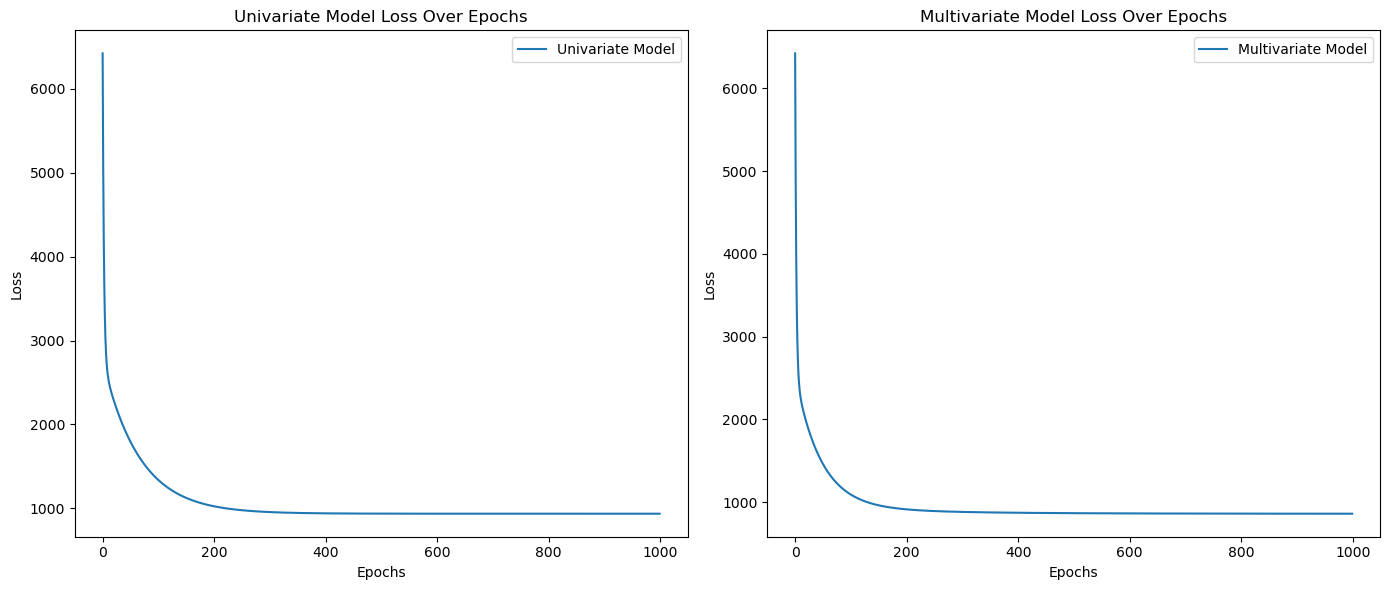

MSE for Univariate Model: 9.704041352165593
MSE for Multivariate Model: 8.896846419331379


In [20]:
# Training parameters
T = 1000
alpha = 0.001 # lower alpha for multivariate as well

# Train univariate model
theta_uni, loss_uni = grad_descent(X_univariate, y, T, alpha)

# Train multivariate model
theta_multi, loss_multi = grad_descent(X_multivariate, y, T, alpha)

# Plot loss over epochs
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(range(T), loss_uni, label='Univariate Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Univariate Model Loss Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(T), loss_multi, label='Multivariate Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Multivariate Model Loss Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate MSE for univariate and multivariate models
mse_training_univariate = np.mean((X_univariate.dot(theta_uni) - y)**2)
mse_training_multivariate = np.mean((X_multivariate.dot(theta_multi) - y)**2)

print(f'MSE for Univariate Model: {mse_training_univariate}')
print(f'MSE for Multivariate Model: {mse_training_multivariate}')

Next, we want to test our models on two different test datasets: for one dataset, we will use income from 2015-2019 (inclusive), and for the other, we will use 2020-2022 data (inclusive, taking into account that things may be different because of COVID-19, so it is feasible that the model's performance could be significantly different between both of these datasets).

In [21]:
# Creates a merged dataset given a time range (inclusive)
def merge_datasets(time_range):
    co2_percap_train = co2_percap.filter(items=['country'] + [str(year) for year in range(time_range[0], time_range[1] + 1)])
    gdp_percap_train = gdp_percap.filter(items=['country'] + [str(year) for year in range(time_range[0], time_range[1] + 1)])
    inc_day_train = inc_day.filter(items=['country'] + [str(year) for year in range(time_range[0], time_range[1] + 1)])

    co2_percap_mean = co2_percap_train.set_index('country').mean(axis=1).reset_index()
    gdp_percap_mean = gdp_percap_train.set_index('country').mean(axis=1).reset_index()
    inc_day_mean = inc_day_train.set_index('country').mean(axis=1).reset_index()

    merged_data = co2_percap_mean.merge(gdp_percap_mean, on='country').merge(inc_day_mean, on='country')
    merged_data.columns = ['country', 'CO2_per_capita', 'GDP_per_capita', 'Income_per_capita']

    return merged_data

# Obtain desired data for the two testing time periods
merged_data_2015_2019 = merge_datasets([2015, 2019]).dropna()
merged_data_2020_2022 = merge_datasets([2020, 2022]).dropna()
scaler = MinMaxScaler()

# Test univariate model on 2015-2019 data
X_univariate_test = merged_data_2015_2019[['CO2_per_capita']].values
X_univariate_test = np.hstack((np.ones((X_univariate_test.shape[0], 1)), X_univariate_test))
X_univariate_test[:, 1:] = scaler.fit_transform(X_univariate_test[:, 1:])
y_univariate_pred = X_univariate_test.dot(theta_uni)

# Test multivariate model on 2015-2019 data
X_multivariate_test = merged_data_2015_2019[['CO2_per_capita', 'GDP_per_capita']].values
X_multivariate_test = np.hstack((np.ones((X_multivariate_test.shape[0], 1)), X_multivariate_test))
X_multivariate_test[:, 1:] = scaler.fit_transform(X_multivariate_test[:, 1:])
y_multivariate_pred = X_multivariate_test.dot(theta_multi)

# Calculate MSE for both models
mse_univariate = np.mean((y_univariate_pred - merged_data_2015_2019['Income_per_capita'].values)**2)
mse_multivariate = np.mean((y_multivariate_pred - merged_data_2015_2019['Income_per_capita'].values)**2)

# Print MSE for both models
print(f'MSE for Univariate Model (2015-2019): {mse_univariate}')
print(f'MSE for Multivariate Model (2015-2019): {mse_multivariate}')

# Test univariate model on 2020-2022 data
X_univariate_test = merged_data_2020_2022[['CO2_per_capita']].values
X_univariate_test = np.hstack((np.ones((X_univariate_test.shape[0], 1)), X_univariate_test))
X_univariate_test[:, 1:] = scaler.fit_transform(X_univariate_test[:, 1:])
y_univariate_pred = X_univariate_test.dot(theta_uni)

# Test multivariate model on 2020-2022 data
X_multivariate_test = merged_data_2020_2022[['CO2_per_capita', 'GDP_per_capita']].values
X_multivariate_test = np.hstack((np.ones((X_multivariate_test.shape[0], 1)), X_multivariate_test))
X_multivariate_test[:, 1:] = scaler.fit_transform(X_multivariate_test[:, 1:])
y_multivariate_pred = X_multivariate_test.dot(theta_multi)

# Calculate MSE for both models
mse_univariate = np.mean((y_univariate_pred - merged_data_2020_2022['Income_per_capita'].values)**2)
mse_multivariate = np.mean((y_multivariate_pred - merged_data_2020_2022['Income_per_capita'].values)**2)

# Print MSE for both models
print(f'MSE for Univariate Model (2020-2022): {mse_univariate}')
print(f'MSE for Multivariate Model (2020-2022): {mse_multivariate}')

MSE for Univariate Model (2015-2019): 13.867476484954366
MSE for Multivariate Model (2015-2019): 14.777744214159666
MSE for Univariate Model (2020-2022): 12.237848963255306
MSE for Multivariate Model (2020-2022): 13.134232214946179


## Part 6 - Conclusions

We can see that the MSE for the univariate and multivariate models are different for both test datasets, in the same direction.  
The MSE for the univariate model pre-COVID years is less than the multivariate model for the same years.  
Likewise, the MSE for the univariate model in the post-COVID years is less than the multivariate model for the same years.  
This means that, for both instances, predicting daily income based solely off of CO2 emissions without the inclusion of GDP per capita is more accurate.  
This is interesting, because this means that CO2 emissions is a fairly good predictor of daily income.  
